# RLab01 - Gabriele Bertinelli (1219907 - tri)

In [197]:
library(tidyverse)
library(ggplot2)
library(dplyr)
library(scales)
library(lubridate)

## Ex 1

### 1)

In [33]:
# importing data
a_a <- read.delim('./american_airline_empl.txt', header = TRUE, sep = "\t")
d_a <- read.delim('./delta_airline_empl.txt', header = TRUE, sep = "\t")
fedex_a <- read.delim('./federal_express_empl.txt', header = TRUE, sep = "\t")
u_a <-read.delim('./united_airline_empl.txt', header = TRUE, sep = "\t")

In [8]:
# Adding "Company" column

a_a <- add_column(a_a, Company = 'A_A')
d_a <- add_column(d_a, Company = 'D_A')
fedex_a <- add_column(fedex_a, Company = 'FEDEX_A')
u_a <- add_column(u_a, Company = 'U_A')

### 2)

In [9]:
# joining databases

data_1 <- full_join(a_a, d_a)
data_2 <- full_join(data_1, fedex_a)

# final database
data <- full_join(data_2, u_a)

Joining with `by = join_by(Month, Year, `Full-time`, `Part-time`, `Grand
Total`, Company)`
Joining with `by = join_by(Month, Year, `Full-time`, `Part-time`, `Grand
Total`, Company)`
Joining with `by = join_by(Month, Year, `Full-time`, `Part-time`, `Grand
Total`, Company)`


In [34]:
# dataframe to tibble
data <- as_tibble(data)

In [ ]:
# ordering data by year and month
data <- data[order(data$Year, data$Month),]

In [ ]:
# renaming columns
data <- rename(data,
    month = Month,
    year = Year,
    full_time = 'Full-time',
    part_time = 'Part-time',
    grand_total = 'Grand Total',
    company = Company
    )

### 3)

In [40]:
# adding Date column
data <- group_by(data, company)%>%
  mutate(Date = make_date(year, month))

In [94]:
data_full <- select(data, -c(part_time, grand_total))
data_part <- select(data, -c(full_time, grand_total))

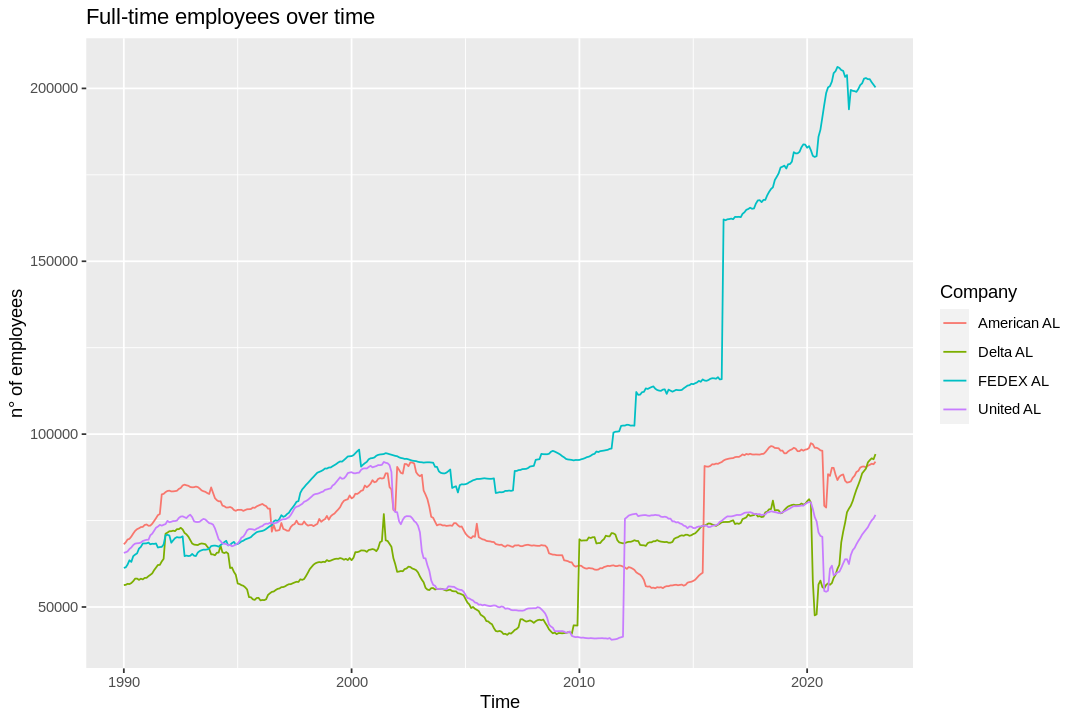

In [548]:
full_plot <- ggplot(data_full, aes(x = Date, y = full_time, color = company)) +
  geom_line() +
  labs(title = "Full-time employees over time",
       x = "Time",
       y = "n° of employees") +
  scale_color_discrete(name = "Company", 
                      labels = c("American AL", "Delta AL", "FEDEX AL", "United AL"))
  options(repr.plot.width=9, repr.plot.height=6)
print(full_plot)

ggsave("full_time_empl.png", full_plot, width =10, height = 8, dpi = 300)

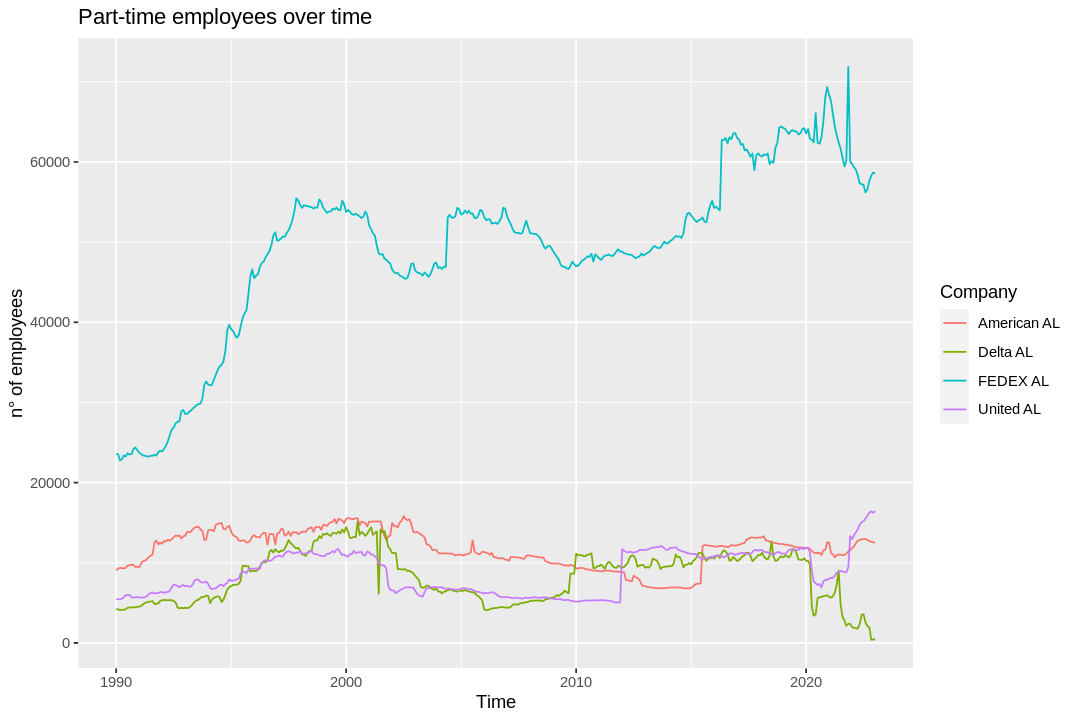

In [550]:
part_plot <- ggplot(data_part, aes(x = Date, y = part_time, color = company)) +
  geom_line() +
  labs(title = "Part-time employees over time",
       x = "Time",
       y = "n° of employees") +
  scale_color_discrete(name = "Company", 
                      labels = c("American AL", "Delta AL", "FEDEX AL", "United AL"))
  options(repr.plot.width=9, repr.plot.height=6)
print(part_plot)
ggsave("part_time_empl.png", part_plot, width =10, height = 8, dpi = 300)

### 4)

Calculating when did each company reach the minimum and maximum number of employess in two different ways. The results, happily, are the same.

In [139]:
max_empl <- filter(data, grand_total == max(grand_total))

In [130]:
max_empl

month year full_time part_time grand_total company Date      
1 3     2001  91041    11005     102046      U_A     2001-03-01
2 6     2018  96543    12628     109171      A_A     2018-06-01
3 3     2021 204406    65977     270383      FEDEX_A 2021-03-01
4 1     2023  94236      439      94675      D_A     2023-01-01

In [134]:
count_max <- mutate(data, n_empl  = rank(-grand_total, ties.method = "random")) %>%
  filter(n_empl == 1) %>% select(-n_empl)

In [135]:
count_max

month year full_time part_time grand_total company Date      
1 3     2001  91041    11005     102046      U_A     2001-03-01
2 6     2018  96543    12628     109171      A_A     2018-06-01
3 3     2021 204406    65977     270383      FEDEX_A 2021-03-01
4 1     2023  94236      439      94675      D_A     2023-01-01

In [136]:
min_empl <- filter(data, grand_total == min(grand_total))

In [137]:
min_empl

month year full_time part_time grand_total company Date      
1  1    1990 61305     23580     84885       FEDEX_A 1990-01-01
2 11    2006 41948      4462     46410       D_A     2006-11-01
3  6    2011 40522      5259     45781       U_A     2011-06-01
4  9    2013 55462      6828     62290       A_A     2013-09-01

In [146]:
count_min <- mutate(data, n_empl  = rank(grand_total, ties.method = "random")) %>%
  filter(n_empl == 1) %>% select(-n_empl)

In [149]:
count_min

month year full_time part_time grand_total company Date      
1  1    1990 61305     23580     84885       FEDEX_A 1990-01-01
2 11    2006 41948      4462     46410       D_A     2006-11-01
3  6    2011 40522      5259     45781       U_A     2011-06-01
4  9    2013 55462      6828     62290       A_A     2013-09-01

### 5)

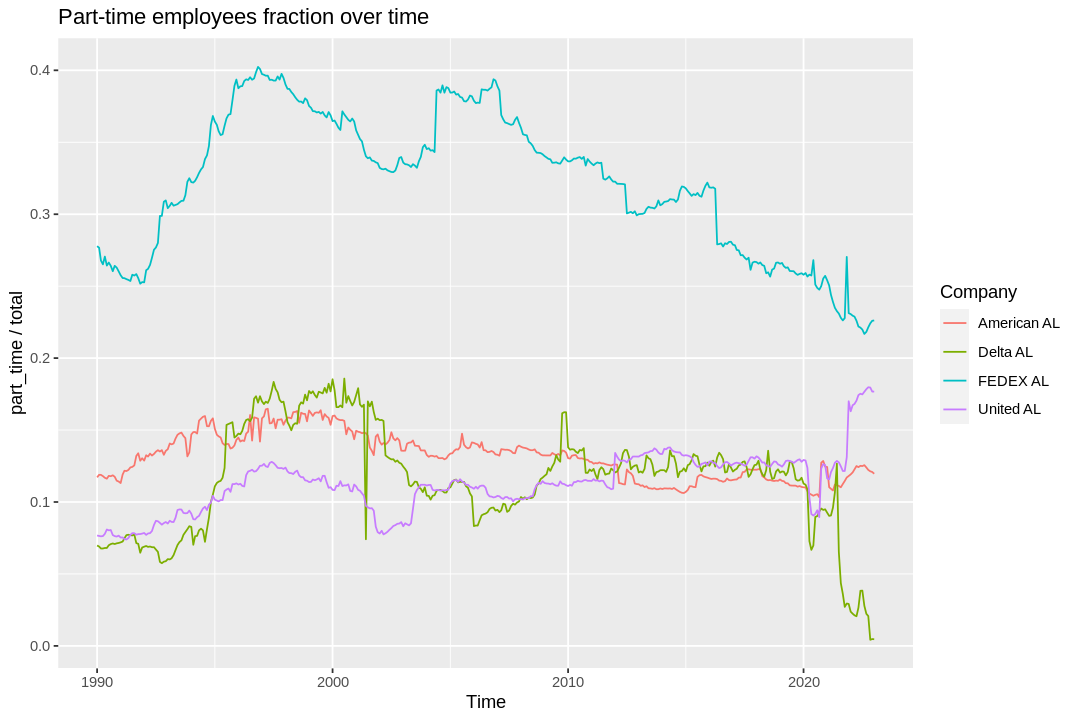

In [539]:
frac_tot <- data$part_time / data$grand_total
part_frac <- tibble(part_time = data$part_time, grand_total = data$grand_total, frac = frac_tot, company = data$company, Date = data$Date)
part_tot <- ggplot(part_frac, aes(x = Date, y = frac_tot, color = company)) +
  geom_line() +
  labs(title = "Part-time employees fraction over time",
       x = "Time",
       y = "part_time / total") +
  scale_color_discrete(name = "Company", 
                      labels = c("American AL", "Delta AL", "FEDEX AL", "United AL"))
  options(repr.plot.width=9, repr.plot.height=6)

print(part_tot)

ggsave("part_frac.png", part_tot, width =10, height = 8, dpi = 300)

### 6)

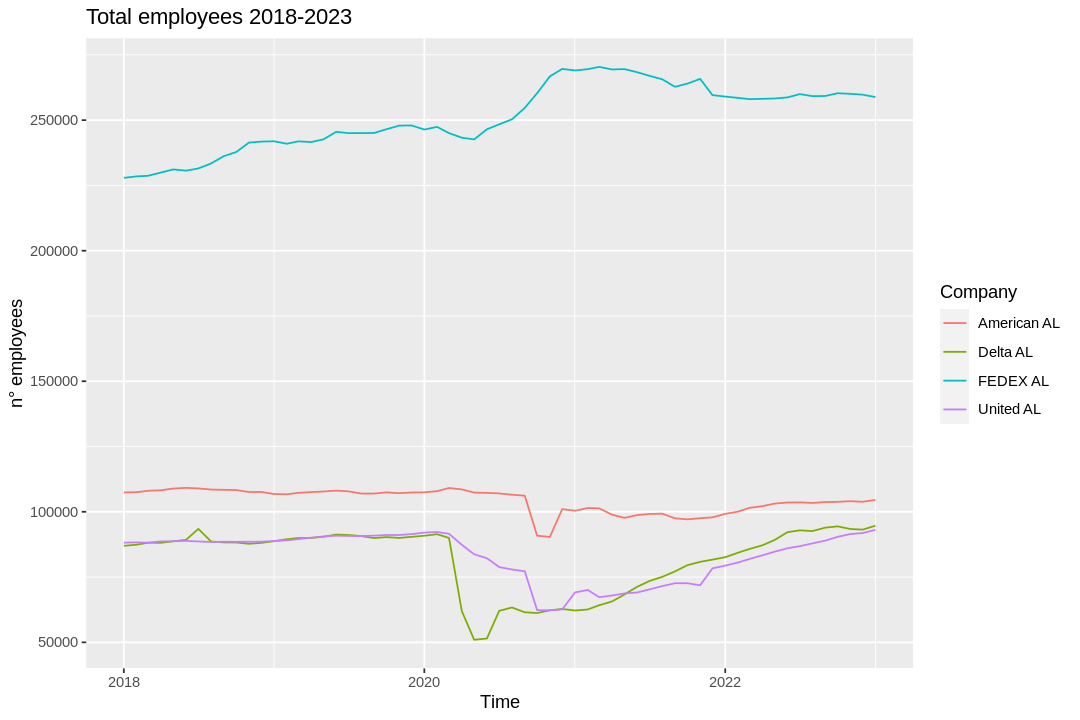

In [540]:
library(scales)

data_covid <- data %>% filter(year>=2018) %>% select(Date, grand_total, company)
covid <- ggplot(data_covid, aes(x = Date, y = grand_total, color = company)) +
        geom_line() +
        labs(title = "Total employees 2018-2023",
        x = "Time",
        y = "n° employees") +
        scale_color_discrete(name = "Company", 
                            labels = c("American AL", "Delta AL", "FEDEX AL", "United AL")) + 
        scale_y_continuous(breaks= pretty_breaks())

        options(repr.plot.width=9, repr.plot.height=6)
print(covid)
ggsave("covid_trend.png", covid, width =10, height = 8, dpi = 300)

In the restricted data from 2018-2023 we can see a decrease in the number of employees for each company.  
Delta Airline and FedEx experienced a decrease around mid-2020. Delta AL is the company which experienced the major loss of employees during the pandemic period. American AL and United AL experienced a decrease around the end of 2020.  
The n° of employees, after the sudden loss, increased for all the companies but American AL,  for which the number remained more or less fixed around 100,000.

### Plots resume

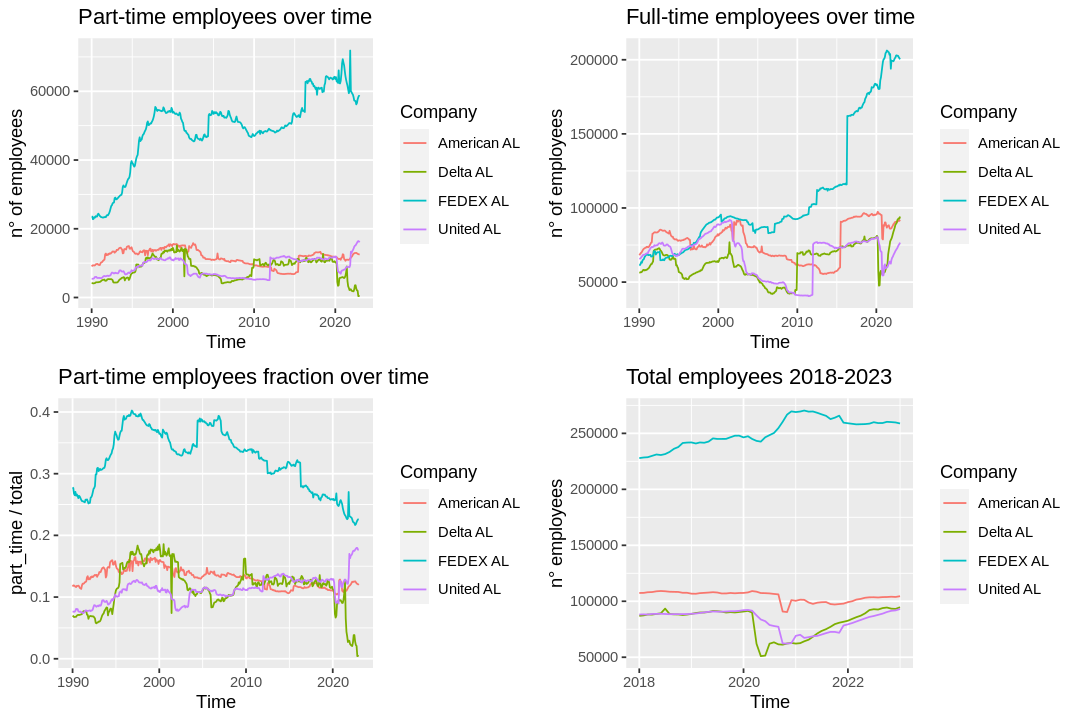

In [552]:
plot_resume <- grid.arrange(part_plot, full_plot, part_tot, covid, nrow=2, ncol = 2)
#ggsave('plot_resume.pdf', plot_resume, dpi=300)

In [551]:
# saving plots in a pdf file

#l <- list(part_plot, full_plot, part_tot, covid)
#ggsave('ex1_plot_resume.pdf', width = 9, height = 9, dpi=300, marrangeGrob(grobs = l, nrow=2, ncol=1), device = "pdf")

## Ex 2

In [86]:
#install.packages('nycflights13')
library(nycflights13)

In [87]:
head(flights)

year month day dep_time sched_dep_time dep_delay arr_time sched_arr_time
1 2013 1     1   517      515             2         830      819          
2 2013 1     1   533      529             4         850      830          
3 2013 1     1   542      540             2         923      850          
4 2013 1     1   544      545            -1        1004     1022          
5 2013 1     1   554      600            -6         812      837          
6 2013 1     1   554      558            -4         740      728          
  arr_delay carrier flight tailnum origin dest air_time distance hour minute
1  11       UA      1545   N14228  EWR    IAH  227      1400     5    15    
2  20       UA      1714   N24211  LGA    IAH  227      1416     5    29    
3  33       AA      1141   N619AA  JFK    MIA  160      1089     5    40    
4 -18       B6       725   N804JB  JFK    BQN  183      1576     5    45    
5 -25       DL       461   N668DN  LGA    ATL  116       762     6     0    
6  12       UA      1696   N39463  EWR    ORD  150       719     5    58    
  time_hour          
1 2013-01-01 05:00:00
2 2013-01-01 05:00:00
3 2013-01-01 05:00:00
4 2013-01-01 05:00:00
5 2013-01-01 06:00:00
6 2013-01-01 05:00:00

### 1)

#### 1.1)

In [88]:
nyc_dep_flight <- mutate(flights, day = as.Date(time_hour)) %>%
                  group_by(origin, day) %>%
                  summarize(count = n()) %>%
                  ungroup()

`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.


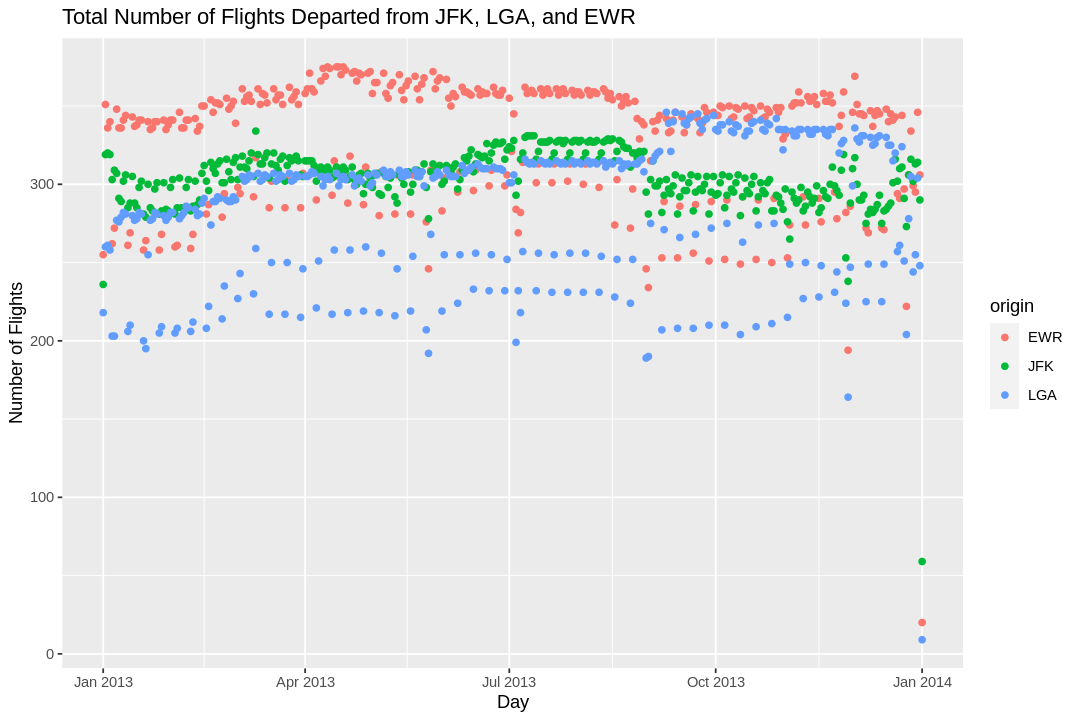

In [89]:
nyc_dep_plot <- ggplot(nyc_dep_flight, aes(x = day, y=count, color = origin)) +
                  geom_point() +
                  labs(title = "Total Number of Flights Departed from JFK, LGA, and EWR",
                       x = "Day",
                       y = "Number of Flights") +
                  scale_fill_manual(name = "Airport",
                                     values = c("#E69F00", "#56B4E9", "#009E73"),
                                     labels = c("JFK", "LGA", "EWR"))
                  options(repr.plot.width=9, repr.plot.height=6)
print(nyc_dep_plot)
#ggsave("nyc_dep_plot.png", nyc_dep_plot, width =10, height = 8, dpi = 300)

#### 1.2)

In [90]:
week_flights <- mutate(flights, day = as.Date(time_hour)) %>%
              mutate(day_of_week = wday(day, label = TRUE)) %>% # add a `day_of_week` column
              mutate(week_number = week(day)) %>%
              filter(day_of_week %in% c("Mon", "Tue", "Wed", "Thu", "Fri")) %>% # filter to include only the first five working days of each week
              group_by(origin, week_number) %>% # group the data by `origin` and `week_number`
              summarize(avg_flights = mean(n())) # calculate the average number of flights for each group

`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.


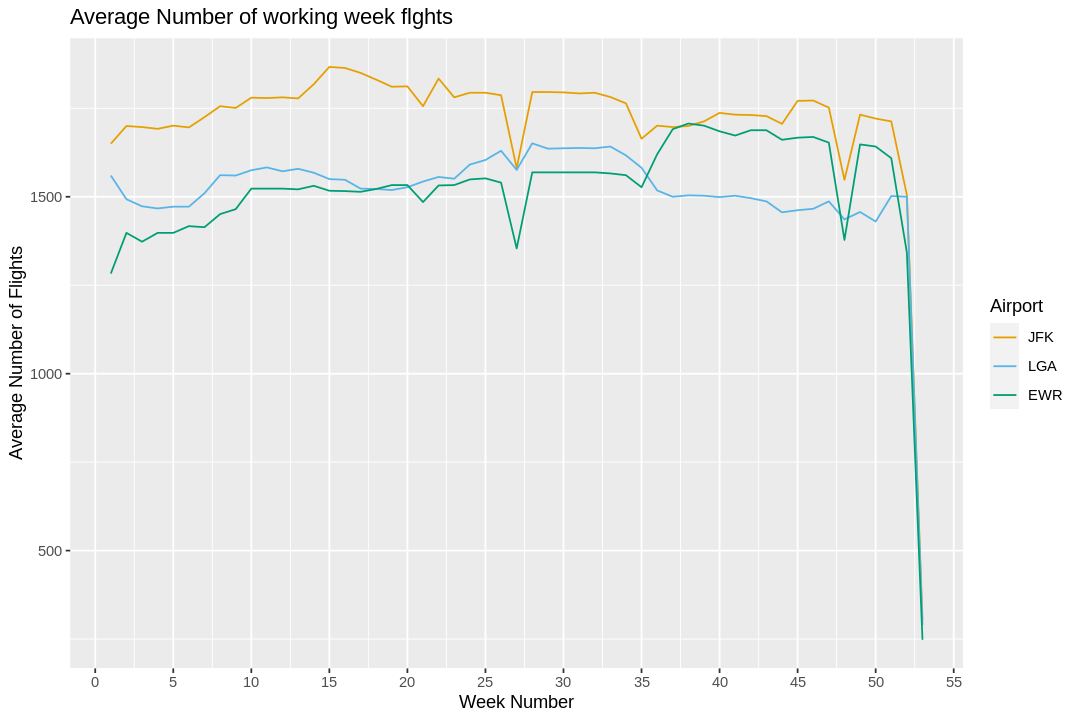

In [91]:
week_plot <- ggplot(week_flights, aes(x = week_number, y = avg_flights, color = origin)) +
              geom_line() +
              labs(title = "Average Number of working week flghts",
                   x = "Week Number",
                   y = "Average Number of Flights") +
              scale_color_manual(name = "Airport",
                                 values = c("#E69F00", "#56B4E9", "#009E73"),
                                 labels = c("JFK", "LGA", "EWR")) +
            scale_x_continuous(breaks = pretty(week_flights$week_number, n = 12)) 
options(repr.plot.width=9, repr.plot.height=6)
print(week_plot)
#ggsave("week_flights.png", week_plot, width =10, height = 8, dpi = 300)

In [92]:
wke_flights <- mutate(flights, day = as.Date(time_hour)) %>%
              mutate(day_of_week = wday(day, label = TRUE)) %>% # add a `day_of_week` column
              mutate(week_number = week(day)) %>%
              filter(day_of_week %in% c("Sat", "Sun")) %>% # filter to include only the first five working days of each week
              group_by(origin, week_number) %>% # group the data by `origin` and `week_number`
              summarize(avg_flights = mean(n())) # calculate the average number of flights for each group

`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.


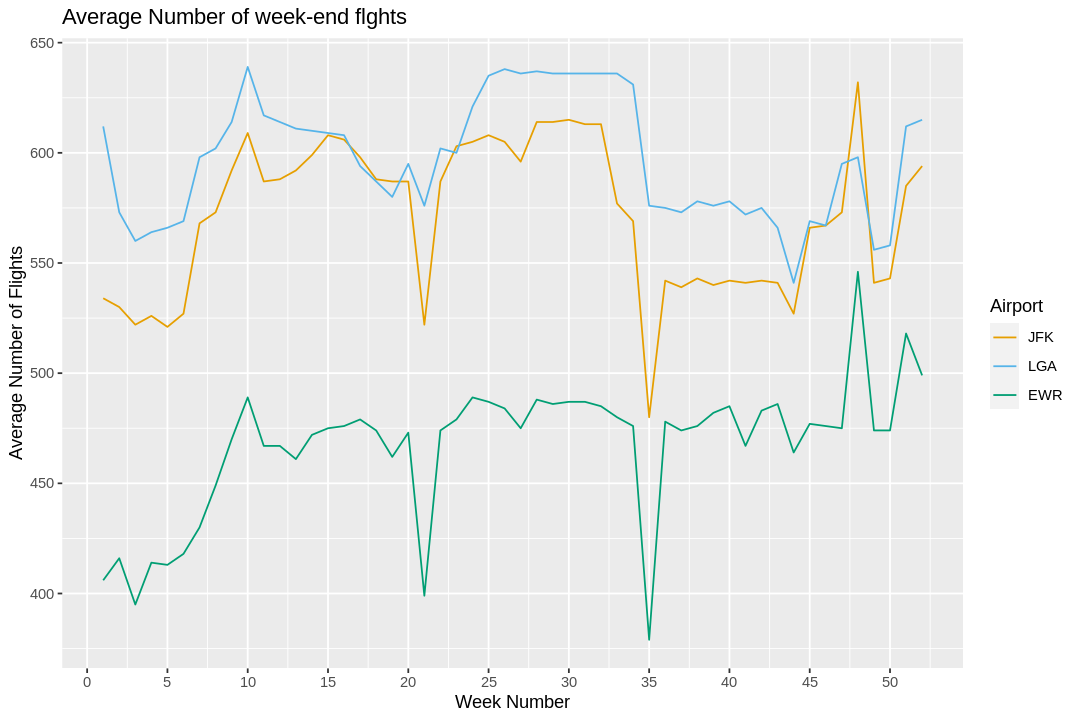

In [93]:
wke_plot <- ggplot(wke_flights, aes(x = week_number, y = avg_flights, color = origin)) +
              geom_line() +
              labs(title = "Average Number of week-end flghts",
                   x = "Week Number",
                   y = "Average Number of Flights") +
              scale_color_manual(name = "Airport",
                                 values = c("#E69F00", "#56B4E9", "#009E73"),
                                 labels = c("JFK", "LGA", "EWR")) +
            scale_x_continuous(breaks = pretty(wke_flights$week_number, n = 12)) 
options(repr.plot.width=9, repr.plot.height=6)
print(wke_plot)
#ggsave("wke_flights.png", wke_plot, width =10, height = 8, dpi = 300)

### 2)

In [94]:
min_delay <- mutate(flights, day = as.Date(time_hour)) %>%
             na.omit() %>%        
             group_by(origin, day) %>% 
             summarise(min_dep_del = min(dep_delay))

max_delay <- mutate(flights, day = as.Date(time_hour)) %>%
             na.omit() %>%        
             group_by(origin, day) %>% 
             summarise(max_dep_del = max(dep_delay))

avg_delay <- mutate(flights, day = as.Date(time_hour)) %>%
             na.omit() %>%        
             group_by(origin, day) %>% 
             summarise(avg_dep_del = mean(dep_delay))

`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'origin'. You can override using the
`.groups` argument.


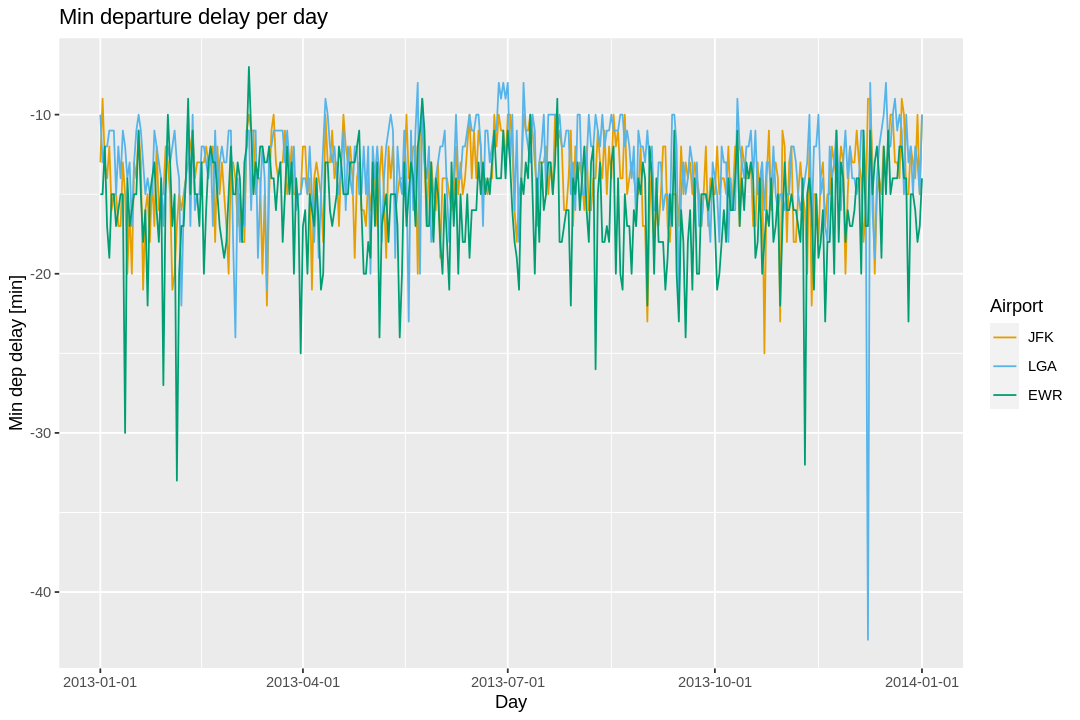

In [95]:
min_del_plot <- ggplot(min_delay, aes(x = day, y = min_dep_del, color = origin)) +
              geom_line() +
              labs(title = "Min departure delay per day",
                   x = "Day",
                   y = "Min dep delay [min]") +
              scale_color_manual(name = "Airport",
                                 values = c("#E69F00", "#56B4E9", "#009E73"),
                                 labels = c("JFK", "LGA", "EWR"))+
            scale_x_continuous(breaks = pretty(min_delay$day, n = 4)) 
options(repr.plot.width=9, repr.plot.height=6)
print(min_del_plot)
#ggsave("min_delay.png", min_del_plot, width = 10, height = 8, dpi = 300)

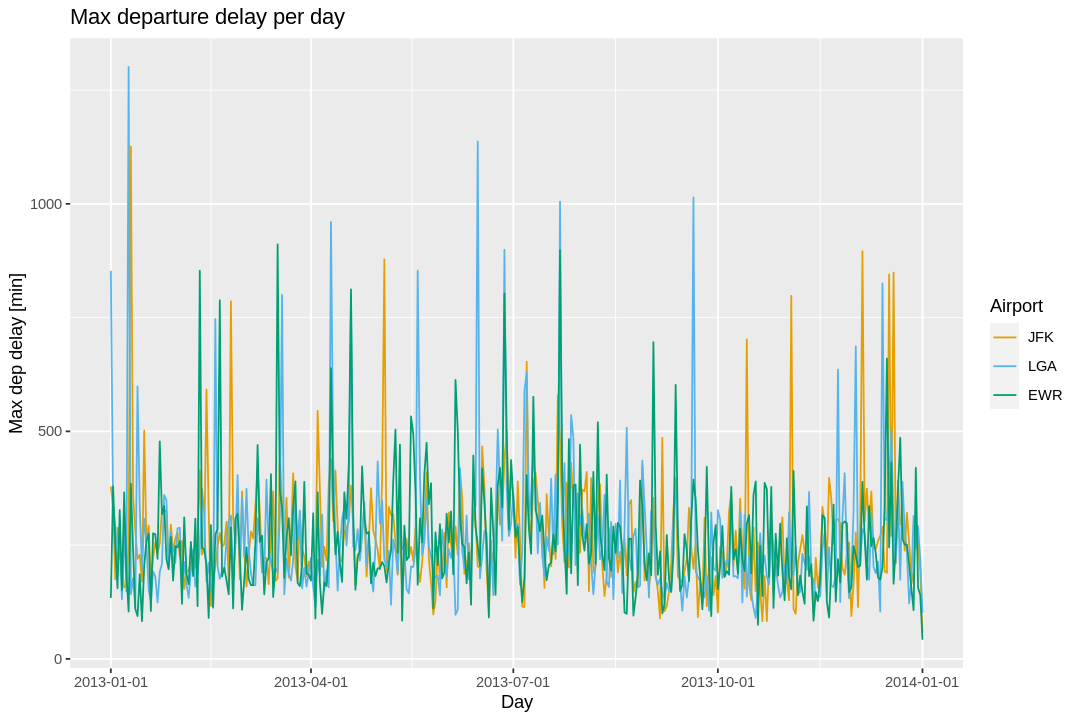

In [96]:
max_del_plot <- ggplot(max_delay, aes(x = day, y = max_dep_del, color = origin)) +
              geom_line() +
              labs(title = "Max departure delay per day",
                   x = "Day",
                   y = "Max dep delay [min]") +
              scale_color_manual(name = "Airport",
                                 values = c("#E69F00", "#56B4E9", "#009E73"),
                                 labels = c("JFK", "LGA", "EWR"))+
            scale_x_continuous(breaks = pretty(max_delay$day, n = 4)) 
options(repr.plot.width=9, repr.plot.height=6)
print(max_del_plot)
#ggsave("max_delay.png", max_del_plot, width = 10, height = 8, dpi = 300)

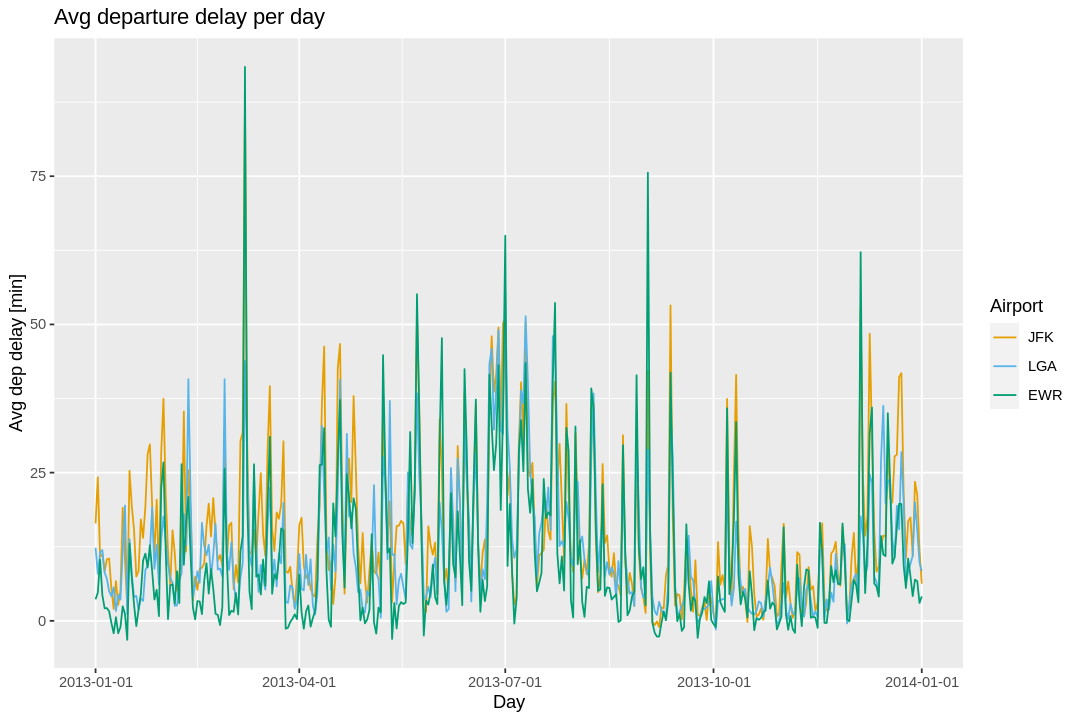

In [97]:
avg_del_plot <- ggplot(avg_delay, aes(x = day, y = avg_dep_del, color = origin)) +
              geom_line() +
              labs(title = "Avg departure delay per day",
                   x = "Day",
                   y = "Avg dep delay [min]") +
              scale_color_manual(name = "Airport",
                                 values = c("#E69F00", "#56B4E9", "#009E73"),
                                 labels = c("JFK", "LGA", "EWR"))+
            scale_x_continuous(breaks = pretty(avg_delay$day, n = 4)) 
options(repr.plot.width=9, repr.plot.height=6)
print(avg_del_plot)
#ggsave("avg_delay.png", avg_del_plot, width = 10, height = 8, dpi = 300)

### 3)

In [98]:
mi_per_min <- flights$distance / flights$air_time # replace with your value
kmh_speed <- mi_per_min * 96.5606

In [99]:
avg_speed <- mutate(flights, day = as.Date(time_hour)) %>%
             mutate(speed = kmh_speed) %>%
             na.omit()%>%
             group_by(day) %>% 
             summarise(avg_kmh_speed = mean(speed))

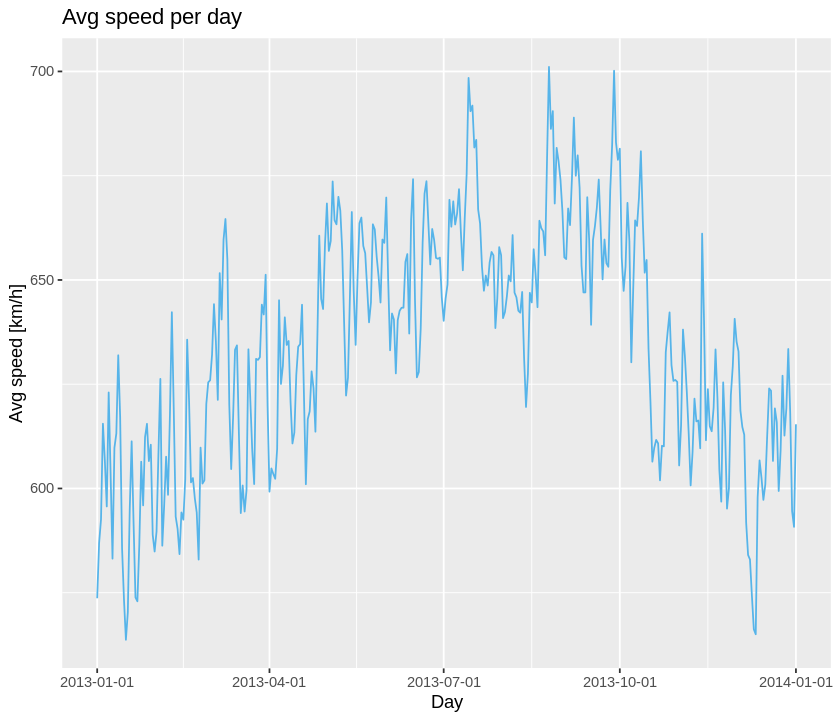

In [100]:
speed_plot <- ggplot(avg_speed, aes(x = day, y = avg_kmh_speed)) +
              geom_line(color = '#56B4E9') +
              labs(title = "Avg speed per day",
                   x = "Day",
                   y = "Avg speed [km/h]") +
        
            scale_x_continuous(breaks = pretty(avg_speed$day, n = 4)) 
options(repr.plot.width=7, repr.plot.height=6)
print(speed_plot)
#ggsave("avg_speed_plot.png", speed_plot, width = 10, height = 8, dpi = 300)

### 4)

#### 4.1)

In [101]:
day_flight <- mutate(flights, day = as.Date(time_hour)) %>%
                 na.omit()%>%
                 group_by(carrier, day) %>% 
                 summarise(count = n())

week_flight <- mutate(flights, day = as.Date(time_hour)) %>%
                 na.omit()%>%
                 mutate(week = week(day)) %>%
                 group_by(carrier, week) %>% 
                 summarise(count = n())

`summarise()` has grouped output by 'carrier'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'carrier'. You can override using the
`.groups` argument.


In [102]:
day_top <- day_flight %>%
                       group_by(day) %>%
                       slice_max(count, n=2)

week_top <- week_flight %>%
                       group_by(week) %>%
                       slice_max(count, n=2)

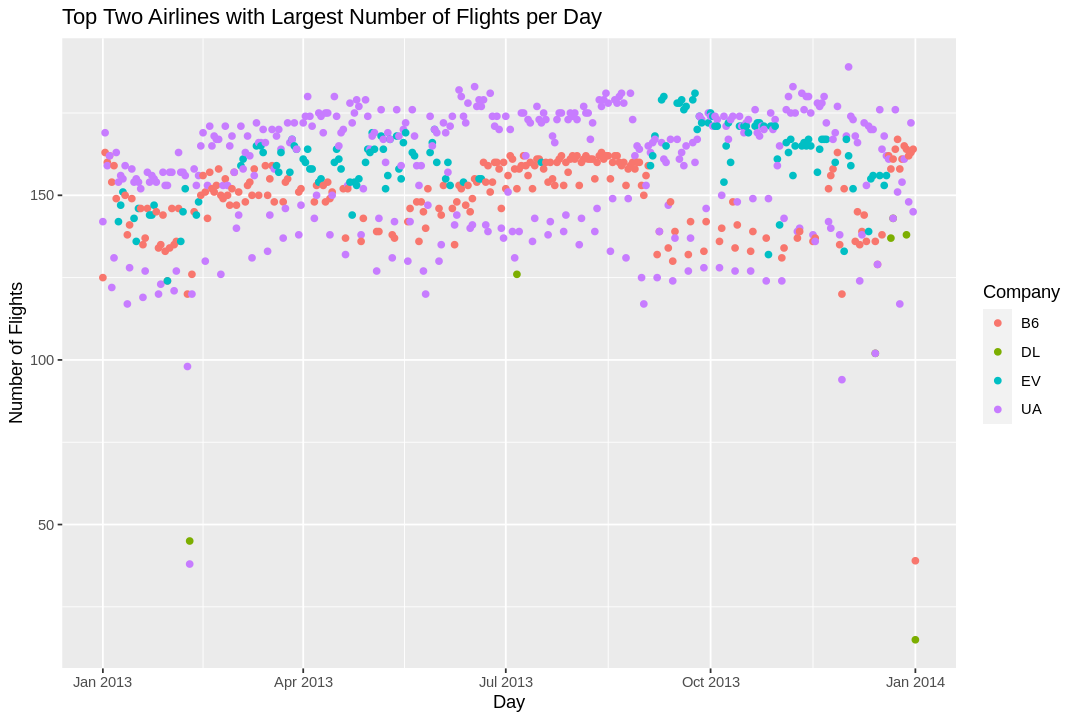

In [103]:
day_top_plot <- ggplot(day_top, aes(x = day, y=count, color=carrier))+
              geom_point() +
              labs(title = "Top Two Airlines with Largest Number of Flights per Day",
               x = "Day",
               y = "Number of Flights",
               color = "Company") 
              #scale_fill_manual(values = c("#E69F00", "#56B4E9")) 
options(repr.plot.width=9, repr.plot.height=6)
print(day_top_plot)
#ggsave("day_top.png", day_top_plot, width = 10, height = 8, dpi = 300)

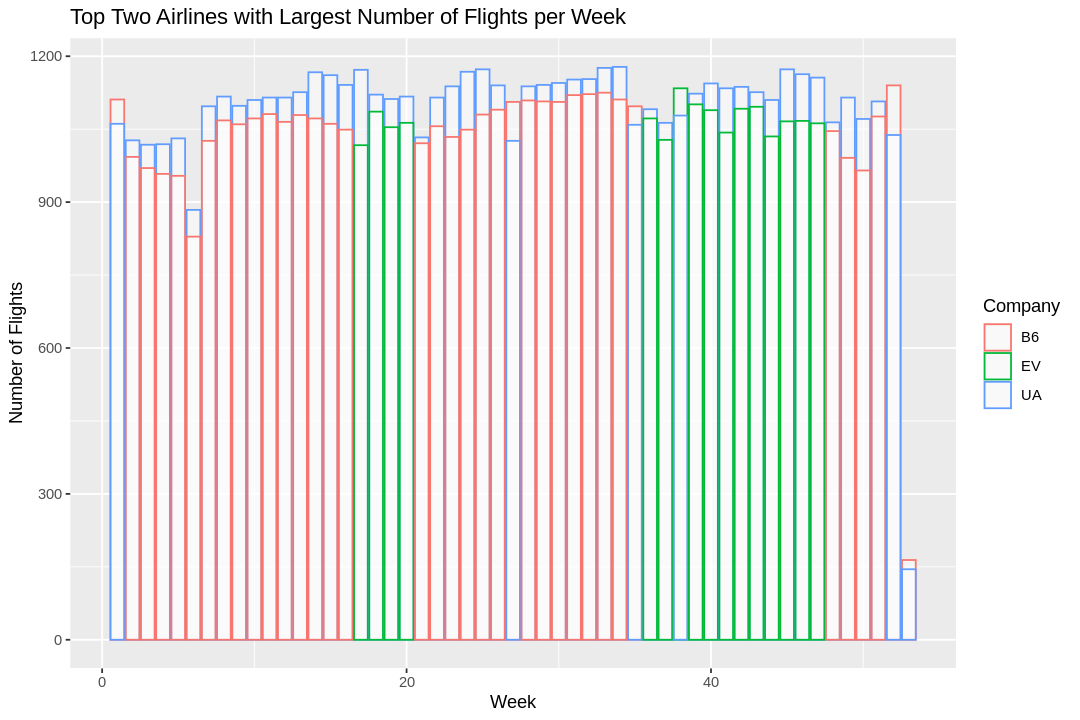

In [104]:
week_top_plot <- ggplot(week_top, aes(x = week, y=count, color=carrier))+
              geom_bar(fill='white', alpha=0.5, stat = "identity", position='identity') +
              labs(title = "Top Two Airlines with Largest Number of Flights per Week",
               x = "Week",
               y = "Number of Flights",
               color = "Company") 
              #scale_fill_manual(values = c("#E69F00", "#56B4E9")) 
options(repr.plot.width=9, repr.plot.height=6)
print(week_top_plot)
#ggsave("week_top.png", week_top_plot, width = 10, height = 8, dpi = 300)

#### 4.2)

In [105]:
month_flight <- mutate(flights, day = as.Date(time_hour)) %>%
                 na.omit()%>%
                 mutate(month = month(day)) %>%
                 group_by(carrier, month) %>%
                 summarise(count_a = n())

month_flop <- month_flight %>%
                       group_by(month) %>%
                      slice_min(order_by=count_a, n=1)

`summarise()` has grouped output by 'carrier'. You can override using the
`.groups` argument.


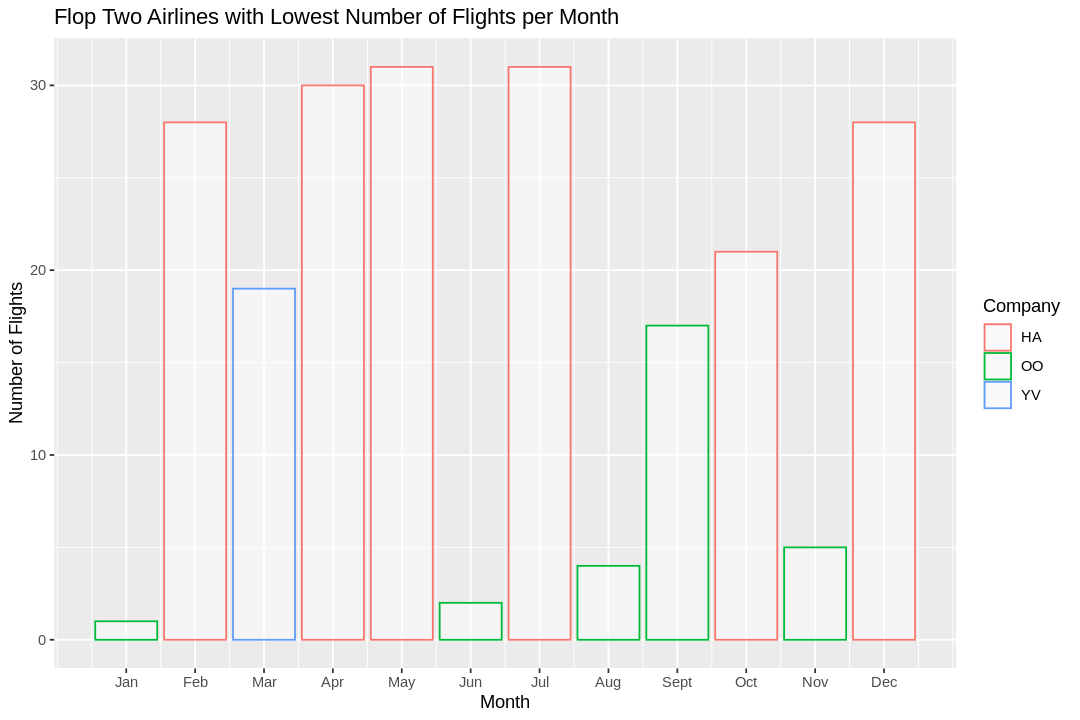

In [106]:
my_labels <- c("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec")

month_flop_plot <- ggplot(month_flop, aes(x=month, y=count_a, color=carrier))+
              geom_bar(fill='white', alpha=0.5, stat = "identity", position = "dodge") +
              labs(title = "Flop Two Airlines with Lowest Number of Flights per Month",
               x = "Month",
               y = "Number of Flights",
               color = "Company") +
              scale_x_continuous(breaks=seq(1,12,1), labels=my_labels)

options(repr.plot.width=9, repr.plot.height=6)
print(month_flop_plot)
#ggsave("week_top.png", week_top_plot, width = 10, height = 8, dpi = 300)

#### 4.3)

In [107]:
dist_month_flight <- mutate(flights, day = as.Date(time_hour)) %>%
                 na.omit()%>%
                 mutate(month = month(day)) %>%
                 group_by(carrier, month) %>%
                 summarize(max_dist = max(distance))
                 

dist_flight <- dist_month_flight %>%
                       group_by(month) %>%
                      summarize(company = carrier[which.max(max_dist)], max_distance = max_dist[which.max(max_dist)])

`summarise()` has grouped output by 'carrier'. You can override using the
`.groups` argument.


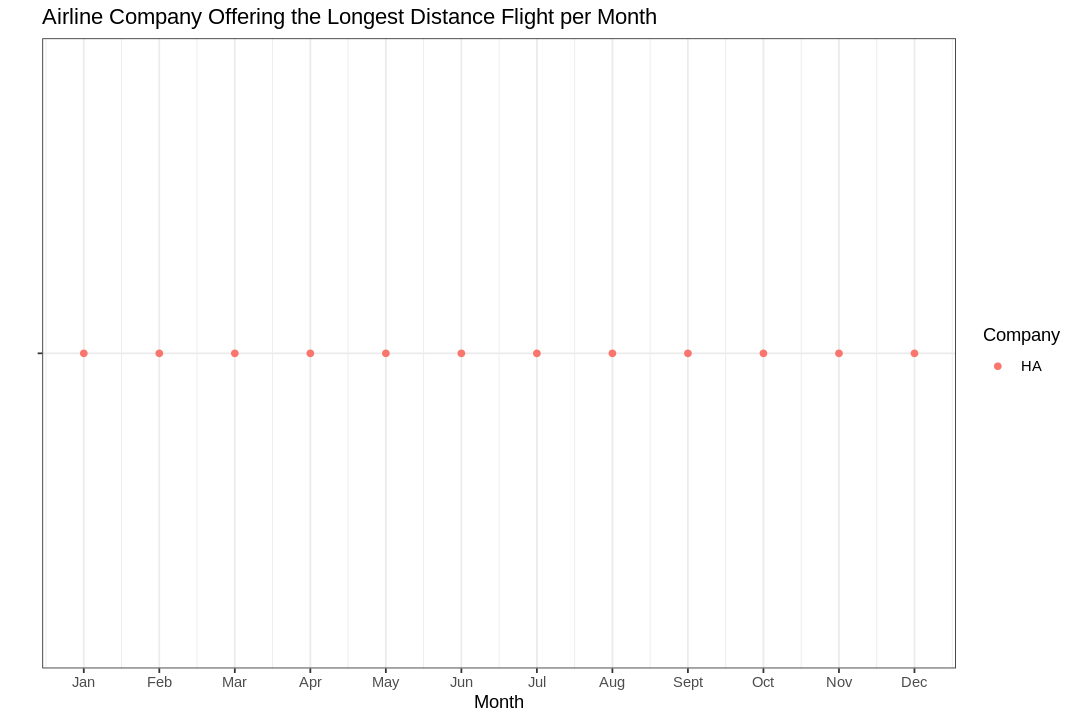

In [108]:
dist_flight_plot <- ggplot(dist_flight, aes(x=month, y=company, color=company))+
              geom_point() +
              labs(title = "Airline Company Offering the Longest Distance Flight per Month",
               x = "Month",
               y=' ',
               color="Company")+
              scale_x_continuous(breaks=seq(1,12,1), labels=my_labels) + 
              scale_y_discrete(labels=' ')+
             theme(axis.ticks.y=element_blank(), panel.grid.minor = element_blank(), axis.text.y=element_blank(), axis.title.x=element_blank())+ 
             theme_bw()
options(repr.plot.width=9, repr.plot.height=6)
print(dist_flight_plot)
#ggsave("week_top.png", week_top_plot, width = 10, height = 8, dpi = 300)

In [110]:
library(gridExtra)
l <- list(nyc_dep_plot, week_plot, wke_plot, min_del_plot, max_del_plot, avg_del_plot, speed_plot, day_top_plot, week_top_plot, month_flop_plot, dist_flight_plot)
ggsave('ex2_plot_resume.pdf', width = 9, height = 9, dpi=300, marrangeGrob(grobs = l, nrow=2, ncol=1), device = "pdf")


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


